# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [41]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways/"
pages = 100
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [43]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(100)

,reviews
0,✅ Trip Verified | Booked a flight from Buchar...
1,✅ Trip Verified | Booked online months ago an...
2,✅ Trip Verified | The flight was on time. The...
3,"Not Verified | Angry, disappointed, and unsat..."
4,"✅ Trip Verified | As an infrequent flyer, Bri..."
...,...
95,✅ Trip Verified | Another really great pair of...
96,Not Verified | Our A380 developed a fault tax...
97,Not Verified | Horrible airline. Does not care...
98,✅ Trip Verified | My family and I have flown ...


In [44]:
df.to_csv("data/BA_reviews.csv")

In [45]:
reviews = pd.read_csv('BA_reviews.csv')
reviews = reviews.pop('reviews')
reviews

0      ✅ Trip Verified |  Booked a flight from Buchar...
1      ✅ Trip Verified |  Booked online months ago an...
2      ✅ Trip Verified |  The flight was on time. The...
3      Not Verified |  Angry, disappointed, and unsat...
4      ✅ Trip Verified |  As an infrequent flyer, Bri...
                             ...                        
995    ✅ Trip Verified |  \r\nVenice to London City. ...
996    ✅ Trip Verified |  San Francisco to London. Te...
997    ✅ Trip Verified |  Heathrow to Vancouver. The ...
998    ✅ Trip Verified |  London to Bucharest. First ...
999    ✅ Trip Verified |  I forgot I had purchased a ...
Name: reviews, Length: 1000, dtype: object

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [46]:
def string_punctuation(text):
    for punctuation in string.punctuation:
        text  = text.replace(punctuation , '')
        return text

In [47]:
reviews = reviews.str.replace('Trip Verified |' , '')
reviews = reviews.str.replace('✅' , '')
reviews = reviews.str.replace('|' , '')
reviews = reviews.str.replace('\n' , '')
reviews = reviews.str.replace('\r' , '')
reviews = reviews.str.replace(r'\b(\w{1,3)\b}' , '')
reviews = reviews.apply(string_punctuation)
reviews


C:\Users\Ankur\AppData\Local\Temp\ipykernel_21584\3348410112.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews = reviews.str.replace('Trip Verified |' , '')
C:\Users\Ankur\AppData\Local\Temp\ipykernel_21584\3348410112.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  reviews = reviews.str.replace('|' , '')
C:\Users\Ankur\AppData\Local\Temp\ipykernel_21584\3348410112.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews = reviews.str.replace(r'\b(\w{1,3)\b}' , '')


0         Booked a flight from Bucharest to Mancheste...
1         Booked online months ago and the only hitch...
2         The flight was on time. The crew were polit...
3      Not Verified   Angry, disappointed, and unsati...
4         As an infrequent flyer, British Airways was...
                             ...                        
995       Venice to London City. Really we had a grea...
996       San Francisco to London. Terrible service a...
997       Heathrow to Vancouver. The seats booked not...
998       London to Bucharest. First class ground sta...
999       I forgot I had purchased a hand baggage onl...
Name: reviews, Length: 1000, dtype: object

In [48]:
reviews.shape

(1000,)

In [49]:
freq_words = pd.Series(' '.join(reviews).lower().split()).value_counts()[:50]
freq_words

the        7148
to         5203
and        4365
was        3212
a          3164
i          2975
of         1953
in         1915
on         1733
for        1666
flight     1455
with       1325
my         1303
not        1294
we         1227
that       1134
they       1119
is         1065
were       1020
at         1003
ba          978
it          975
had         917
but         900
have        833
this        830
no          783
as          725
from        706
very        574
our         566
me          562
an          547
service     537
so          511
be          504
you         494
are         477
there       417
british     412
when        404
london      399
which       394
food        393
one         392
crew        386
their       378
by          375
after       367
seat        366
dtype: int64

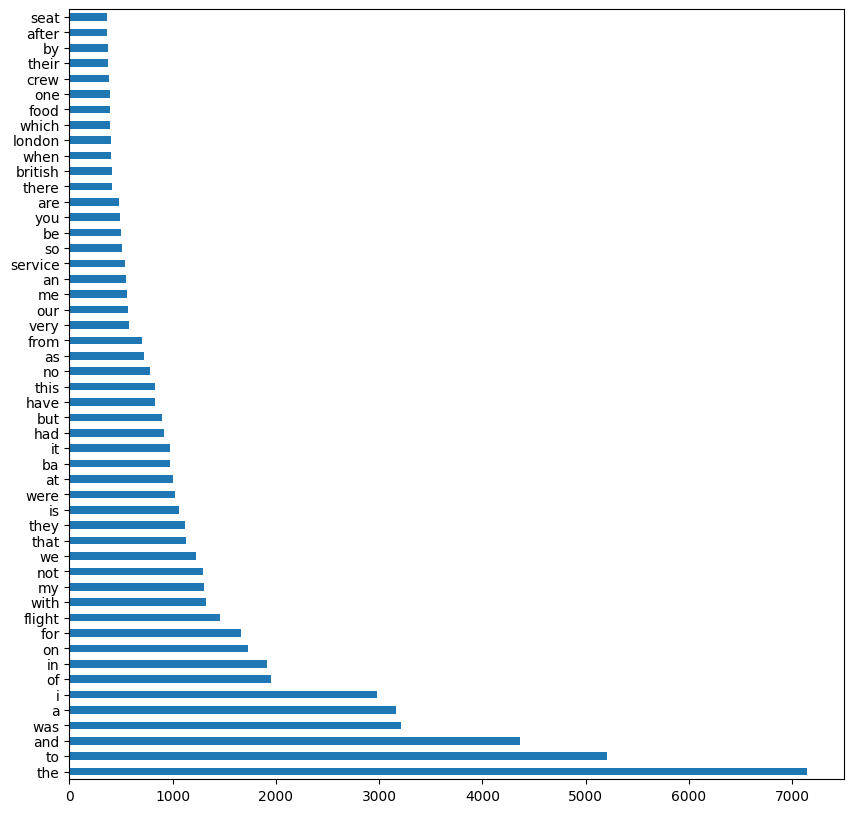

In [50]:
plt.figure(figsize=(10,10))
freq_words.plot.barh(x= freq_words[0] , y= freq_words[1])
plt.show()

##